We want to see how Expectation-Maximization Method will retrieve knowledge for 


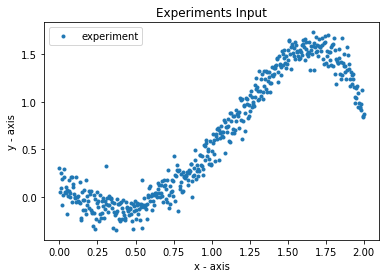

In [14]:
#  Machine Learning DSIT UOA
#  Assignment 1 - vi - Expectation Maximization

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np 

# Generate Training Data ----------------------- *
#Build  N = 500 sample Data (training data set) in [0,2] that follow the form y = th0 + th1.x + th2.x^2 + th3.x^3 + th5.x^5 (Eq.1)  with sigma^2=0.05.
def y_training_set(t0, t1, t2, t3, t5, mu,sigma, N_sam, r__start, r__end):

    # x = np.arange(r__start, r__end, r_step )      #doesn't includes 2 in range [0,2]
    x = np.linspace(r_start, r_end, num= N_sam)     #includes 2 in range [0,2]
    noise = np.random.normal(mu,sigma, size=(N_sam,))  #check dimensionality(!!!!!) - pending
    # noise = 0
    y = t5*x**5 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

    return(x, y)

#Vector Parameter (True)
th0 = 0.1
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#data range
r_start = 0
r_end = 2
N  = 500
step = (r_end - r_start) / N

mu, sigma = 0, 0.1 # mean and standard deviation


x, y = y_training_set(th0, th1, th2, th3, th5, mu,sigma,N, r_start, r_end)
# Training Data ----------------------- *


# Define convergence threshold
e = 0.01 #-------input!?!

k = 1



a_temp = 1 #signa-th^-2
b_temp = 1 #signa-h^-2

# x_mean = np.mean(x)
#  1/(N*b_temp+a_temp)

sigma2_th_wrt_y = []
sigma2_th_wrt_y = np.linalg.pinv(a_temp * np.eye(x.shape[0]) + b_temp * (x.T).dot(x))
# mi_th_wrt_y  = []
mi_th_wrt_y = b_temp * sigma2_th_wrt_y.dot(x.T).dot(y)

# Φ.Τ*Φ
ΧΧ = x[:, None].dot(x.reshape (-1,1).T)   #x.x.T - (500,500)  table

alpha_ir = pow(mi_th_wrt_y,2) + np.matrix.trace(sigma2_th_wrt_y)
bita_ir  = pow((y-x*mi_th_wrt_y),2) + np.matrix.trace(ΧΧ.dot(sigma2_th_wrt_y))
# bita_ir  = pow((y-x*mi_th_wrt_y),2) + np.matrix.trace(np.matmul(np.matmul(x,sigma2_th_wrt_y),x.T))  #trace?

a_temp = k/alpha_ir
b_temp = N/bita_ir

# plotting the points 
plt.plot(x, y, marker='.', linewidth=0, label = 'experiment') 

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('Experiments Input') 

# function to show the plot 
plt.legend()
# plt.show() 


In [18]:
np.matrix.trace(ΧΧ.dot(sigma2_th_wrt_y))

167.33616783296802

In [ ]:
sigma2_th_wrt_y.shape

(500, 500)

In [ ]:
mi_th_wrt_y

173.4396828892796

In [ ]:
(x).dot(x.T)

667.3346693386774